# 梯度下降法

计算高维函数的局部极小值

对于函数  $f = f(\vec{x})$, 在 $(\vec{x}, f(\vec{x}))$ 点上， 沿着负梯度的方向是函数值下降最快的方向

也即为, 迭代方向为 

$$\vec{x}_{k+1} = \vec{x}_{k} - \alpha_{k}\nabla f(\vec{x}_{k})$$

其中$\alpha_{k}$为步长

In [1]:
# 举一个简单的例子

f = lambda x, y: x**2+y**2-2*x*y+y**2-2*y # 所要优化的函数

In [2]:
diff_fx = lambda x, y: 2*x-2*y#偏导数
diff_fy = lambda x, y: 4*y-2*x-2

In [3]:
# 设置起始点, 步长
init_point = [30, 6] 
alph = 0.1

In [4]:
diff_fx(*init_point), diff_fy(*init_point) #初始点的梯度

(48, -38)

In [5]:
for ii in range(30):
    init_point[0] = init_point[0] - alph*diff_fx(*init_point)
    init_point[1] = init_point[1] - alph*diff_fy(*init_point)
print(diff_fx(*init_point), diff_fy(*init_point))

1.386617494686719 0.526631421096333


In [6]:
print(f(*init_point))

0.3958073725790734


实际上这个函数为

$$f(x,y) = (x-y)^{2}+(y-1)^{2}-1$$

当x = y = 1时, 取得最小值 -1

### comment
下面我们可以更深入地讨论梯度下降法的性质, 例如收敛性, 收敛度等等.

我们以二次型函数为例, 考虑一个正定二次型 (这样才会有极小值= =)$$f = \frac{1}{2}\bf{x}^{T}Q\bf{x}$$

我们知道沿着负梯度的方向, 函数值会变小, 但是这里涉及到步长的取值, 我们可以采用一般的一维搜索的方法, 也即为
\begin{equation}
\alpha_{k} = argmin ~ f({x}_{k} -\alpha_{k}g(x_{k}))
\end{equation}
其中$g({x}_{k})=\nabla f({x}_{k})$. 因此我们对$\alpha_{k}$求一个极值即可.
所以有

\begin{equation}
 0 = g(x_{k})^{T}f'({x}_{k} -\alpha_{k}g(x_{k})) \\
 =g(x_{k})^{T}Q({x}_{k} -\alpha_{k}g(x_{k})) \\
\end{equation}

从而得出
 $$\alpha_{k} = \frac{g(x_{k})^{T}g(x_{k})^{T}}{g(x_{k})^{T}Qg(x_{k})^{T}}$$


因此对于二次型的函数而言, 步长为$\alpha_{k}$的梯度下降法为最佳步长, 因此该种算法也被称为最速下降法.

In [7]:
# 仍然以上面的函数为例
f = lambda x, y: x**2+y**2-2*x*y+y**2-2*y # 所要优化的函数
diff_fx = lambda x, y: 2*x-2*y#偏导数
diff_fy = lambda x, y: 4*y-2*x-2
Q = [[2, -2], [-2, 4]]
# 设置起始点
init_point = [30, 6]

In [8]:
import copy
gx, gy = diff_fx(*init_point), diff_fy(*init_point)
path = [copy.deepcopy(init_point)]
for ii in range(30):
    Q = [[2, -2], [-2, 4]]
    alph = (gx**2 + gy**2)/(Q[0][0]*gx**2+Q[1][1]*gy**2+Q[0][1]*gx*gy*2)
    init_point[0] = init_point[0] - alph*diff_fx(*init_point)
    init_point[1] = init_point[1] - alph*diff_fy(*init_point)
    path.append(copy.deepcopy(init_point))
    gx, gy = diff_fx(*init_point), diff_fy(*init_point)
print(diff_fx(*init_point), diff_fy(*init_point))

7.2984678589627094e-06 -1.2736575571992148e-07


In [9]:
print(f(*init_point)) #同样是三十步, 可以看到最速下降法的收敛效果要比给定步长的梯度下降好不少.

-0.9999999999738269


In [10]:
# 定义等高线图的横纵坐标x，y
#从左边取值为从 -3 到 3 ，各取5个点，一共取 5*5 = 25 个点
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-35, 35, 120)
y = np.linspace(-35, 35, 120)
# 将原始数据变成网格数据
X, Y = np.meshgrid(x, y)

Height = (X-Y)**2+(Y-1)**2-1
# 填充颜色
plt.contourf(X, Y, Height, 10, alpha = 0.6, cmap = plt.cm.hot)
# 绘制等高线
C = plt.contour(X, Y, Height, 10, colors = 'black')
# 显示各等高线的数据标签
plt.clabel(C, inline = True, fontsize = 10)

for ii in range(len(path)-1):
    plt.plot([path[ii][0], path[ii+1][0]], [path[ii][1], path[ii+1][1]], color='red')
plt.plot(init_point[0], init_point[1], 'go')
plt.show()

我们可以将程序规范写的规范一些.

In [11]:
import numpy as np

In [12]:
def fastgradient(diff1_f, diff2_f, init_point):
    import copy
    path = [copy.deepcopy(init_point)]
    g = np.array([diff1_f[i](*init_point) for i in range(len(diff1_f))])
    for it in range(100):
        Q = np.zeros((len(diff1_f), len(diff1_f)))
        for ii in range(len(diff1_f)):
            for jj in range(len(diff1_f)):
                Q[ii][jj] = diff2_f[ii][jj](*init_point)
        alph = (np.dot(g, g))/(np.dot(np.dot(g, Q), g))
        init_point = init_point - alph * g
        path.append(copy.deepcopy(init_point))
        g = np.array([diff1_f[i](*init_point) for i in range(len(diff1_f))])
        if sum(abs(g))<0.01:
            break
    return init_point, path

In [13]:
f =lambda x, y: np.exp((x-0.5)**2 + (x-0.5)**2)
diff1_f = [lambda x,y: np.exp((x-0.5)**2 + (x-0.5)**2)*(2*x-1), 
           lambda x,y: np.exp((x-0.5)**2 + (x-0.5)**2)*(2*y-1)]
diff2_f = [[lambda x,y: np.exp((x-0.5)**2 + (x-0.5)**2)*((2*x-1)**2+2), 
            lambda x,y: np.exp((x-0.5)**2 + (x-0.5)**2)*(2*y-1)*(2*x-1)],
          [lambda x,y: np.exp((x-0.5)**2 + (x-0.5)**2)*(2*y-1)*(2*x-1), 
          lambda x,y: np.exp((x-0.5)**2 + (x-0.5)**2)*((2*y-1)**2+2)]]
init_point = np.array([1, 2])
new_point, path = fastgradient(diff1_f, diff2_f, init_point)
print(new_point)

[0.50015873 0.5004762 ]


该函数也即为
$$f(x, y) = \exp[(x-1/2)^{2}+(y-1/2)^{2}]$$

很容易可以看到, (1/2, 1/2)即为函数的极小值点. 下图即为该函数的图像.

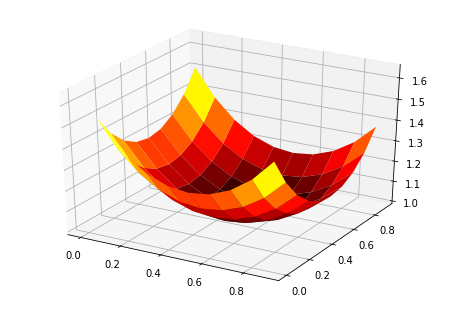

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 1, 0.1)
Y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp((X-0.5)**2 + (Y-0.5)**2)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
#ax.set_zlim(0,2)

# savefig('../figures/plot3d_ex.png',dpi=48)
plt.show()

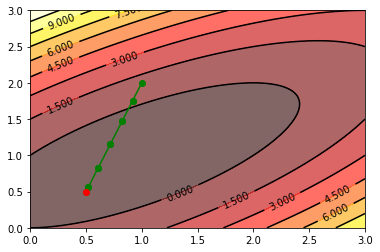

In [15]:
# 定义等高线图的横纵坐标x，y
#从左边取值为从 -3 到 3 ，各取5个点，一共取 5*5 = 25 个点
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
# 将原始数据变成网格数据
X, Y = np.meshgrid(x, y)

Height = (X-Y)**2+(Y-1)**2-1
# 填充颜色
plt.contourf(X, Y, Height, 10, alpha = 0.6, cmap = plt.cm.hot)
# 绘制等高线
C = plt.contour(X, Y, Height, 10, colors = 'black')
# 显示各等高线的数据标签
plt.clabel(C, inline = True, fontsize = 10)

for ii in range(len(path)-1):
    plt.plot([path[ii][0], path[ii+1][0]], [path[ii][1], path[ii+1][1]], 'go-')
plt.plot(new_point[0], new_point[1], 'ro')
plt.show()